### Import thư viện

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### Lấy dữ liệu có sẵn từ thư viện

In [2]:
from sklearn.datasets import load_digits
digits = load_digits() 

X = digits.data 
y = digits.target 
feature_names = digits.feature_names 
target_names = digits.target_names 
  
print("Feature names:", feature_names) 
print("Target names:", target_names) 
print("\nType of X is:", type(X)) 
print("\nFirst 5 rows of X:\n", X[:5])
print("\nData shape:", X.shape)

Feature names: ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']
Target names: [0 1 2 3 4 5 6 7 8 9]

Type of X is: <class 'numpy.ndarray'>

First 5 rows of X:
 [[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15

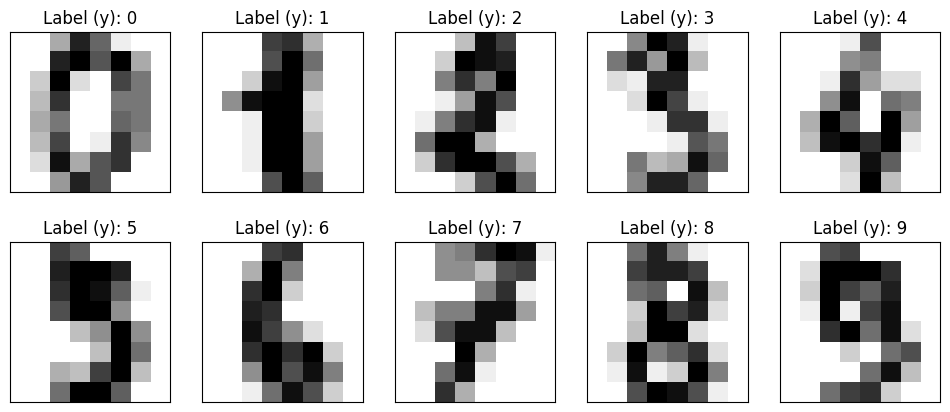

In [3]:
plt.figure(figsize=(12, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    image = X[i].reshape(8, 8)
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.xticks([])
    plt.yticks([])
    plt.title(f"Label (y): {y[i]}")
plt.show()

### Chia dữ liệu

In [4]:
from sklearn.model_selection import train_test_split

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=1)

print("Training set size:", X_train.shape)
print("Validation set size:", X_val.shape)
print("Test set size:", X_test.shape)

Training set size: (1077, 64)
Validation set size: (360, 64)
Test set size: (360, 64)


### Huấn luyện mô hình

##### Hồi quy logistic (Logistic Regression)

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score

hyperparams = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2', 'none'],
    'max_iter': [1000, 2500, 5000]
}

model = LogisticRegression()

best_val_accuracy = 0
best_hyperparams = {}

for C in hyperparams['C']:
    for pen in hyperparams['penalty']:
        for max_iter in hyperparams['max_iter']:
            try:
                model = LogisticRegression(C=C, penalty=pen, max_iter=max_iter)
                model.fit(X_train, y_train)
                y_val_pred = model.predict(X_val)
                val_accuracy = accuracy_score(y_val, y_val_pred)
                if val_accuracy > best_val_accuracy:
                    best_val_accuracy = val_accuracy
                    best_hyperparams = {
                        'penalty': pen,
                        'C': C,
                        'max_iter': max_iter
                    }
            except Exception as e:
                continue

print("Best Hyperparameters:", best_hyperparams)

model = LogisticRegression(**best_hyperparams)
model.fit(X_temp, y_temp)
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred, average=None)

print("Test Accuracy:", test_accuracy)
for i, recall in enumerate(test_recall):
    print(f"Recall for class {i}: {recall}")

Best Hyperparameters: {'penalty': 'l2', 'C': 1, 'max_iter': 1000}
Test Accuracy: 0.9722222222222222
Recall for class 0: 0.9767441860465116
Recall for class 1: 0.9714285714285714
Recall for class 2: 1.0
Recall for class 3: 0.975609756097561
Recall for class 4: 1.0
Recall for class 5: 0.9333333333333333
Recall for class 6: 1.0
Recall for class 7: 0.9459459459459459
Recall for class 8: 0.9310344827586207
Recall for class 9: 0.9705882352941176


##### Cây quyết định (Decision Tree)

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score

hyperparams = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

model = DecisionTreeClassifier()

best_val_accuracy = 0
best_hyperparams = {}

for criterion in hyperparams['criterion']:
    for max_depth in hyperparams['max_depth']:
        for min_samples_split in hyperparams['min_samples_split']:
            for min_samples_leaf in hyperparams['min_samples_leaf']:
                try:
                    model = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
                    model.fit(X_train, y_train)
                    y_val_pred = model.predict(X_val)
                    val_accuracy = accuracy_score(y_val, y_val_pred)
                    if val_accuracy > best_val_accuracy:
                        best_val_accuracy = val_accuracy
                        best_hyperparams = {
                            'criterion': criterion,
                            'max_depth': max_depth,
                            'min_samples_split': min_samples_split,
                            'min_samples_leaf': min_samples_leaf
                        }
                except Exception as e:
                    continue

print("Best Hyperparameters:", best_hyperparams)

model = DecisionTreeClassifier(**best_hyperparams)
model.fit(X_temp, y_temp)
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred, average=None)

print("Test Accuracy:", test_accuracy)
for i, recall in enumerate(test_recall):
    print(f"Recall for class {i}: {recall}")

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 1}
Test Accuracy: 0.8527777777777777
Recall for class 0: 0.9302325581395349
Recall for class 1: 0.8
Recall for class 2: 0.8611111111111112
Recall for class 3: 0.6829268292682927
Recall for class 4: 0.8947368421052632
Recall for class 5: 0.9666666666666667
Recall for class 6: 0.972972972972973
Recall for class 7: 0.8378378378378378
Recall for class 8: 0.8620689655172413
Recall for class 9: 0.7352941176470589


##### K-láng giềng gần nhất (K-Nearest Neighbors)

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score

hyperparams = {
    'neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

model = KNeighborsClassifier()

best_val_accuracy = 0
best_hyperparams = {}

for neighbors in hyperparams['neighbors']:
    for weights in hyperparams['weights']:
        for metric in hyperparams['metric']:
            try:
                model = KNeighborsClassifier(n_neighbors=neighbors, weights=weights, metric=metric)
                model.fit(X_train, y_train)
                y_val_pred = model.predict(X_val)
                val_accuracy = accuracy_score(y_val, y_val_pred)
                if val_accuracy > best_val_accuracy:
                    best_val_accuracy = val_accuracy
                    best_hyperparams = {
                        'n_neighbors': neighbors,
                        'weights': weights,
                        'metric': metric
                    }
            except Exception as e:
                continue

print("Best Hyperparameters:", best_hyperparams)

model = KNeighborsClassifier(**best_hyperparams)
model.fit(X_temp, y_temp)
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred, average=None)

print("Test Accuracy:", test_accuracy)
for i, recall in enumerate(test_recall):
    print(f"Recall for class {i}: {recall}")

Best Hyperparameters: {'n_neighbors': 3, 'weights': 'uniform', 'metric': 'euclidean'}
Test Accuracy: 0.9944444444444445
Recall for class 0: 1.0
Recall for class 1: 1.0
Recall for class 2: 1.0
Recall for class 3: 1.0
Recall for class 4: 1.0
Recall for class 5: 0.9666666666666667
Recall for class 6: 1.0
Recall for class 7: 0.972972972972973
Recall for class 8: 1.0
Recall for class 9: 1.0


##### Mạng nơ-ron nhân tạo (Artificial Neural Network)

In [17]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, recall_score

hyperparams = {
    'hidden_layer_sizes': [(50,), (100,), (50,50)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01]
}

model = MLPClassifier()

best_val_accuracy = 0
best_hyperparams = {}

for hidden_layer_sizes in hyperparams['hidden_layer_sizes']:
    for activation in hyperparams['activation']:
        for solver in hyperparams['solver']:
            for alpha in hyperparams['alpha']:
                try:
                    model = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, activation=activation, solver=solver, alpha=alpha, max_iter=1000)
                    model.fit(X_train, y_train)
                    y_val_pred = model.predict(X_val)
                    val_accuracy = accuracy_score(y_val, y_val_pred)
                    if val_accuracy > best_val_accuracy:
                        best_val_accuracy = val_accuracy
                        best_hyperparams = {
                            'hidden_layer_sizes': hidden_layer_sizes,
                            'activation': activation,
                            'solver': solver,
                            'alpha': alpha
                        }
                except Exception as e:
                    continue

print("Best Hyperparameters:", best_hyperparams)

model = MLPClassifier(**best_hyperparams, max_iter=1000)
model.fit(X_temp, y_temp)
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred, average=None)

print("Test Accuracy:", test_accuracy)
for i, recall in enumerate(test_recall):
    print(f"Recall for class {i}: {recall}")

Best Hyperparameters: {'hidden_layer_sizes': (100,), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.001}
Test Accuracy: 0.9805555555555555
Recall for class 0: 0.9767441860465116
Recall for class 1: 1.0
Recall for class 2: 0.9722222222222222
Recall for class 3: 1.0
Recall for class 4: 0.9736842105263158
Recall for class 5: 0.9666666666666667
Recall for class 6: 1.0
Recall for class 7: 0.972972972972973
Recall for class 8: 0.9655172413793104
Recall for class 9: 0.9705882352941176
